# Restaurant Rating Prediction - (Zomato,Bangalore)

# Contributor - #MOHAMMED ZAKIR NOORAJ

### Data Cleaning

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

#### Importing Dataset

In [3]:
# Reading the data
dataset=pd.read_csv('zomato.csv')
dataset.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
# finding percentage of null values in each column
null_var=dataset.isnull().sum()/dataset.shape[0] *100
null_var

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

##### As url, address and phone columns are not needed to solve our problem statement, we can simply drop them. 54% of data in dish_liked column is null, half of the data in menu_item has empty list and we can only retrieve rating from review_list which we already have so we will drop these three columns as well. We will also drop location and rest_type as they can be replaced by listed_in(type), listed_in(city) which are in proper standards

In [6]:
# Dropping unwanted columns
dataset=dataset.drop(columns=["url","address","phone","reviews_list","location","dish_liked","menu_item","rest_type"])
dataset

,name,online_order,book_table,rate,votes,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,Finger Food,"2,500",Pubs and bars,Whitefield


In [7]:
# Renaming the columns
dataset.rename({"name":"Restaurants",
           "rate":"Rating",
           "approx_cost(for two people)":"Cost",
           "listed_in(type)":"rest_type",
           "listed_in(city)":"City"},inplace=True,axis=1)
dataset.head()

,Restaurants,online_order,book_table,Rating,votes,cuisines,Cost,rest_type,City
0,Jalsa,Yes,Yes,4.1/5,775,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,"North Indian, Rajasthani",600,Buffet,Banashankari


In [8]:
dataset.isnull().sum()

Restaurants        0
online_order       0
book_table         0
Rating          7775
votes              0
cuisines          45
Cost             346
rest_type          0
City               0
dtype: int64

In [9]:
# Dropping Duplicates
dataset.drop_duplicates(inplace=True)

In [10]:
dataset.shape

(51577, 9)

#### Cleaning the data for each column

In [11]:
dataset["Rating"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
# Cleaning rate column, removing /5 from data and replacing 'NEW' and '-' with null value


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: Rating, dtype: float64

In [13]:
dataset["Cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [14]:
# Cleaning the cost column
def costing(cost):
    cost=str(cost)
    if "," in cost:
        cost=cost.replace(",","")
        return float(cost)
    else:
        return float(cost) 
        
dataset["Cost"] = dataset["Cost"].apply(costing)
dataset["Cost"].head(5)

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: Cost, dtype: float64

In [15]:
# Cleaning the restaurant column
dataset['Restaurants'] = dataset['Restaurants'].str.replace('[Ãx][^A-Za-z]+','',regex=True)

In [16]:
dataset

,Restaurants,online_order,book_table,Rating,votes,cuisines,Cost,rest_type,City
0,Jalsa,Yes,Yes,4.1,775,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,"North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Continental,1500.0,Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Finger Food,600.0,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Finger Food,2000.0,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,Finger Food,2500.0,Pubs and bars,Whitefield


In [17]:
dataset.isnull().sum()

Restaurants        0
online_order       0
book_table         0
Rating          9987
votes              0
cuisines          45
Cost             344
rest_type          0
City               0
dtype: int64

In [18]:
dataset.dropna(inplace=True)

In [19]:
dataset.isnull().sum()

Restaurants     0
online_order    0
book_table      0
Rating          0
votes           0
cuisines        0
Cost            0
rest_type       0
City            0
dtype: int64

In [20]:
dataset.shape

(41337, 9)

In [21]:
# Saving the final dataset to excel
dataset.to_excel("zomatoclean_final.xlsx")

### Model Training and Evaluation

In [22]:
# Reading the cleaned data
dataset = pd.read_excel("zomatoclean_final.xlsx",index_col=0)
dataset

,Restaurants,online_order,book_table,Rating,votes,cuisines,Cost,rest_type,City
0,Jalsa,Yes,Yes,4.1,775,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,"North Indian, Continental",800,Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5,81,"Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Continental,1500,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,Finger Food,2500,Pubs and bars,Whitefield


#### Prepaing data for model training - Encoding

In [23]:
training_data = dataset.copy()

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
# Encoding book_table column
encoder_book_table = LabelEncoder()
training_data.book_table = encoder_book_table.fit_transform(training_data.book_table)

In [26]:
# Encoding online_order column
encoder_online_order = LabelEncoder()
training_data.online_order = encoder_online_order.fit_transform(training_data.online_order)

In [27]:
# Encoding cuisines column
encoder_cuisines = LabelEncoder()
training_data.cuisines = encoder_cuisines.fit_transform(training_data.cuisines)

In [28]:
# Encoding rest_type column
encoder_rest_type = LabelEncoder()
training_data.rest_type = encoder_rest_type.fit_transform(training_data.rest_type)

In [29]:
# Encoding city column
encoder_city = LabelEncoder()
training_data.City = encoder_city.fit_transform(training_data.City)

In [30]:
# Reading the encoded data
training_data

,Restaurants,online_order,book_table,Rating,votes,cuisines,Cost,rest_type,City
0,Jalsa,1,1,4.1,775,1901,800,0,1
1,Spice Elephant,1,0,4.1,787,817,800,0,1
2,San Churro Cafe,1,0,3.8,918,654,800,0,1
3,Addhuri Udupi Bhojana,0,0,3.7,88,2229,300,0,1
4,Grand Village,0,0,3.8,166,1928,600,0,1
...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,0,0,3.7,34,1792,800,6,29
51711,Bhagini,0,0,2.5,81,101,800,6,29
51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6,27,867,1500,6,29
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3,236,1209,2500,6,29


##### We don't need Restaurants column for training purpose so we can drop it

In [31]:
# Dropping restaurant column as the rating is independent of it
training_data.drop(columns=["Restaurants"],inplace=True)

<AxesSubplot:>

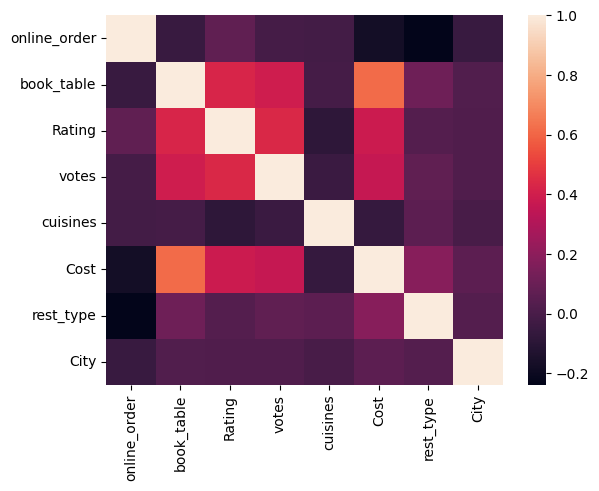

In [32]:
# Visualizing heatmap to find coorelation
sns.heatmap(training_data.corr())

#### Splitting Training and Test Data

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
training_data.columns

Index(['online_order', 'book_table', 'Rating', 'votes', 'cuisines', 'Cost',
       'rest_type', 'City'],
      dtype='object')

In [35]:
# Independent Variales
features = training_data.drop(columns = ["Rating"])

In [36]:
# Dependent Variable
target = training_data["Rating"]

In [37]:
# Splitting training and test data
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.1,random_state=10)

In [38]:
# finding length of train and test data
[len(x) for x in [X_train, X_test, y_train, y_test]]

[37203, 4134, 37203, 4134]

#### 1. Training and Testing with XGBoost Regressor

In [39]:
# Importing the model
from sklearn.metrics import r2_score,mean_squared_error
import xgboost as xg

In [40]:
# Defining the model
XG_Model = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 120, seed = 123)  

In [41]:
# Fitting the model
XG_Model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=120, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, ...)

In [42]:
# Predicting test data using XGBoost
pred = XG_Model.predict(X_test)

In [43]:
# Finding r2 score and mean squared error for test data to check model's performance
r2_score_test_xg=r2_score(y_test,pred)
mean_squared_error_test_xg=mean_squared_error(y_test,pred)
(r2_score_test_xg,mean_squared_error_test_xg)

(0.7351838591369273, 0.052035393701305575)

In [44]:
# Predicting train data using XGBoost
pred_train = XG_Model.predict(X_train)

In [45]:
# Finding r2 score and mean squared error for train data to check model's performance
r2_score_train_xg=r2_score(y_train,pred_train)
mean_squared_error_train_xg=mean_squared_error(y_train,pred_train)
(r2_score_train_xg,mean_squared_error_train_xg)

(0.7826382335026081, 0.042137497306032834)

In [46]:
# Comparing actual and predicted values
df = pd.DataFrame({"y_test" : y_test,"pred":pred})
df

,y_test,pred
28627,2.9,3.001628
36449,4.2,4.259044
380,3.8,3.591591
28172,4.5,4.475447
19225,3.7,3.431192
...,...,...
7038,3.5,3.333582
46552,3.3,3.240853
34812,4.1,4.128781
44397,3.9,3.913894


In [47]:
# Verifying for the predicted values to be in expected range
(df.pred.max(),df.pred.min())

(4.836594, 2.5933332)

#### 2. Training and Testing with Extra Tree Regressor

In [48]:
# Importing the model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor

In [49]:
# Defining the model
ET_Model=ExtraTreesRegressor(n_estimators = 120)

In [50]:
# Fitting the model
ET_Model.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=120)

In [51]:
# Predicting test data using Extra Tree
pred = ET_Model.predict(X_test)

In [52]:
# Finding r2 score and mean squared error for test data to check model's performance
r2_score_test_et=r2_score(y_test,pred)
mean_squared_error_test_et=mean_squared_error(y_test,pred)
(r2_score_test_et,mean_squared_error_test_et)

(0.9023803862536786, 0.019181893587391797)

In [53]:
# Predicting train data using Extra Tree
pred_train = ET_Model.predict(X_train)

In [54]:
# Finding r2 score and mean squared error for train data to check model's performance
r2_score_train_et=r2_score(y_train,pred_train)
mean_squared_error_train_et=mean_squared_error(y_train,pred_train)
(r2_score_train_et,mean_squared_error_train_et)

(0.9994377527842341, 0.00010899658629680403)

In [55]:
# Comparing actual and predicted values
df1=pd.DataFrame({"y_test" : y_test,"pred":pred})
df1

,y_test,pred
28627,2.9,2.915000
36449,4.2,4.195833
380,3.8,3.446667
28172,4.5,4.503333
19225,3.7,3.483333
...,...,...
7038,3.5,3.187500
46552,3.3,3.267500
34812,4.1,4.100000
44397,3.9,3.879167


In [56]:
# Verifying for the predicted values to be in expected range
(df1.pred.max(),df1.pred.min())

(4.89999999999999, 2.0366666666666666)

#### 3. Training and Testing with Random Forest Regressor

In [57]:
# Importing the model
from sklearn.ensemble import RandomForestRegressor

In [58]:
# Defining the model
RF_Model = RandomForestRegressor(n_estimators = 120, random_state = 0)

In [59]:
# Fitting the model
RF_Model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=120, random_state=0)

In [60]:
# Predicting test data using Random Forest
pred = RF_Model.predict(X_test)

In [61]:
# Finding r2 score and mean squared error for test data to check model's performance
r2_score_test_rf=r2_score(y_test,pred)
mean_squared_error_test_rf=mean_squared_error(y_test,pred)
(r2_score_test_rf,mean_squared_error_test_rf)

(0.9035431797423352, 0.018953408961121028)

In [62]:
# Predicting train data using Random Forest
pred_train = RF_Model.predict(X_train)

In [63]:
# Finding r2 score and mean squared error for train data to check model's performance
r2_score_train_rf=r2_score(y_train,pred_train)
mean_squared_error_train_rf=mean_squared_error(y_train,pred_train)
(r2_score_train_rf,mean_squared_error_train_rf)

(0.98594962110772, 0.002723789985067553)

In [64]:
# Comparing actual and predicted values
df2 = pd.DataFrame({"y_test" : y_test,"pred":pred})
df2

,y_test,pred
28627,2.9,2.910000
36449,4.2,4.172500
380,3.8,3.615833
28172,4.5,4.497500
19225,3.7,3.235000
...,...,...
7038,3.5,3.245833
46552,3.3,3.231667
34812,4.1,4.102500
44397,3.9,3.871667


In [65]:
# Verifying for the predicted values to be in expected range
(df2.pred.max(),df2.pred.min())

(4.89999999999999, 2.1866666666666665)

### Comparing the three models

In [66]:
#Comparing models
model_comparison=pd.DataFrame({'Models':['Xgboost','Extra Tree','Random Forest'],
                'r2_score_train':[r2_score_train_xg,r2_score_train_et,r2_score_train_rf],
                'mean_squared_error_train':[mean_squared_error_train_xg,mean_squared_error_train_et,mean_squared_error_train_rf],
                'r2_score_test':[r2_score_test_xg,r2_score_test_et,r2_score_test_rf],
                'mean_squared_error_test':[mean_squared_error_test_xg,mean_squared_error_test_et,mean_squared_error_test_rf]})

In [67]:
model_comparison

,Models,r2_score_train,mean_squared_error_train,r2_score_test,mean_squared_error_test
0,Xgboost,0.782638,0.042137,0.735184,0.052035
1,Extra Tree,0.999438,0.000109,0.902380,0.019182
2,Random Forest,0.985950,0.002724,0.903543,0.018953


##### As we can see from the performance of all the three models, Random Forest is the best model for our dataset as its r2 score for the test data is highest

### Saving Random forest Regressor

In [68]:
import pickle

In [69]:
# Saving the model
model_file = open("C:\\Users\\Dell\\saves\\best_model.sav", 'wb') 
pickle.dump(RF_Model, model_file)
model_file.close()
loaded_RF_Model = pickle.load(open("C:\\Users\\Dell\\saves\\best_model.sav", 'rb'))
result = loaded_RF_Model.score(X_test, y_test)
print(result)

0.9035431797423352


In [70]:
pred = loaded_RF_Model.predict(X_test)

In [71]:
# Verifying the r2 score with saved model
r2_score(y_test,pred)

0.9035431797423352

In [72]:
# Saving encodes for column book_table
encoder_file= open("C:\\Users\\Dell\\saves\\encoder_book_table.sav", 'wb')
pickle.dump(encoder_book_table, encoder_file)
encoder_file.close()

In [73]:
# Saving encodes for column city
encoder_file= open("C:\\Users\\Dell\\saves\\encoder_city.sav", 'wb')
pickle.dump(encoder_city, encoder_file)
encoder_file.close()

In [74]:
# Saving encodes for column cuisines
encoder_file= open("C:\\Users\\Dell\\saves\\encoder_cuisines.sav", 'wb')
pickle.dump(encoder_cuisines, encoder_file)
encoder_file.close()

In [75]:
# Saving encodes for column online_order
encoder_file= open("C:\\Users\\Dell\\saves\\encoder_online_order.sav", 'wb')
pickle.dump(encoder_online_order, encoder_file)
encoder_file.close()

In [76]:
# Saving encodes for column rest_type
encoder_file= open("C:\\Users\\Dell\\saves\\encoder_rest_type.sav", 'wb')
pickle.dump(encoder_rest_type, encoder_file)
encoder_file.close()

### Calculating Approximate Latency for Model

In [77]:
import time 

In [78]:
# Length of test data
l = len(X_test)
l

4134

In [79]:
# Measuring response time of model 
pred_time_list=[]
for i in range(10): 
    start = time.time() 
    result = RF_Model.predict(X_test)
    end = time.time()
    pred_time_list.append(end-start)
print(pred_time_list) 

[0.33310914039611816, 0.2952091693878174, 0.24933266639709473, 0.2403571605682373, 0.22838997840881348, 0.221785306930542, 0.22151541709899902, 0.2642555236816406, 0.3251304626464844, 0.2730143070220947]


##### We measured the response time of our model 10 times for better results. We will now took the average of all the 10 response times and will divide it by length of test data in order to get response time for a particular input

In [80]:
# Measuring response time of model for a particular input
latency = pd.Series(pred_time_list).mean()/l

In [81]:
latency

6.415334137730629e-05

##### The response time of our model for a particular input of dataset came out to be 6.415334137730629e-05